In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<br></br>
# Benchmark time

- KMeans: 54.29s
- KNeighborsClassifier: 633.01s
- KNeighborsClassifier_kd_tree: 112.92s
- daal4py_KMeans: 34.01s
- daal4py_KNeighborsClassifier: 121.97s
- daal4py_KNeighborsClassifier_kd_tree: 75.18s
- total: 1031.41s

<br></br>
## KNeighborsClassifier

In [2]:
d4p_knn = pd.read_csv('sklearn_benchmarks/results/daal4py/KNeighborsClassifier.csv')

In [3]:
skl_knn = pd.read_csv('sklearn_benchmarks/results/sklearn/KNeighborsClassifier.csv')

In [4]:
merged_df_knn = skl_knn.merge(d4p_knn, on=['estimator', 'function', 'n_samples', 'n_features', 'algorithm', 'n_jobs', 'n_neighbors'], suffixes=['_skl', '_d4p'])

In [5]:
merged_df_knn['speedup'] = merged_df_knn['mean_time_elapsed_skl'] / merged_df_knn['mean_time_elapsed_d4p']

ValueError: shape mismatch: objects cannot be broadcast to a single shape

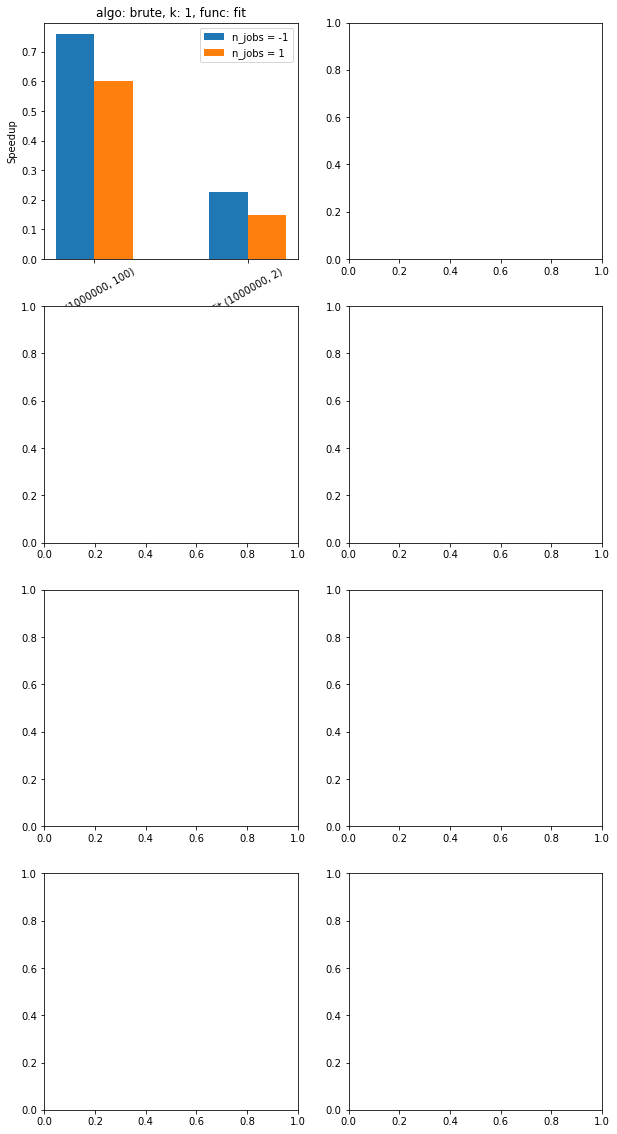

In [9]:
BAR_WIDTH = .25
merged_df_knn_grouped = merged_df_knn.groupby(['algorithm', 'n_neighbors', 'function'])
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()
for (params, df), ax in zip(merged_df_knn_grouped, axes):
    df = df.loc[(df.n_samples + df.n_features).sort_values().index]
    n_jobs_vals = df['n_jobs'].unique()
    n_bars = len(n_jobs_vals)
    for i, val in enumerate(n_jobs_vals):
        x = np.arange(n_bars)
        n_bars = len(n_jobs_vals)
        if i % 2 == 0:
            x = x - BAR_WIDTH / n_bars
        else:
            x = x + BAR_WIDTH / n_bars
        height = df['speedup'][df['n_jobs'] == val]
        label="n_jobs = %s" % val
        ax.bar(x, height=height, width=BAR_WIDTH, label=label, align='edge')
    title = "algo: %s, k: %s, func: %s" % params
    ax.set_title(title)
    ax.set_xticks(x)
    labels = ["%s (%s, %s)" % tuple(row) for row in df[['function', 'n_samples', 'n_features']].values]
    labels = np.unique(labels)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_ylabel('Speedup')
    ax.legend()
fig.tight_layout()

<br></br>
# KNeighborsClassifier k-d tree

In [10]:
d4p_knn_kd_tree = pd.read_csv('sklearn_benchmarks/results/daal4py/KNeighborsClassifier_kd_tree.csv')
skl_knn_kd_tree = pd.read_csv('sklearn_benchmarks/results/sklearn/KNeighborsClassifier_kd_tree.csv')
merged_df_knn_kd_tree = skl_knn_kd_tree.merge(d4p_knn_kd_tree, on=['estimator', 'function', 'n_samples', 'n_features', 'algorithm', 'n_jobs', 'n_neighbors'], suffixes=['_skl', '_d4p'])
merged_df_knn_kd_tree['speedup'] = merged_df_knn_kd_tree['mean_time_elapsed_skl'] / merged_df_knn_kd_tree['mean_time_elapsed_d4p']

ValueError: shape mismatch: objects cannot be broadcast to a single shape

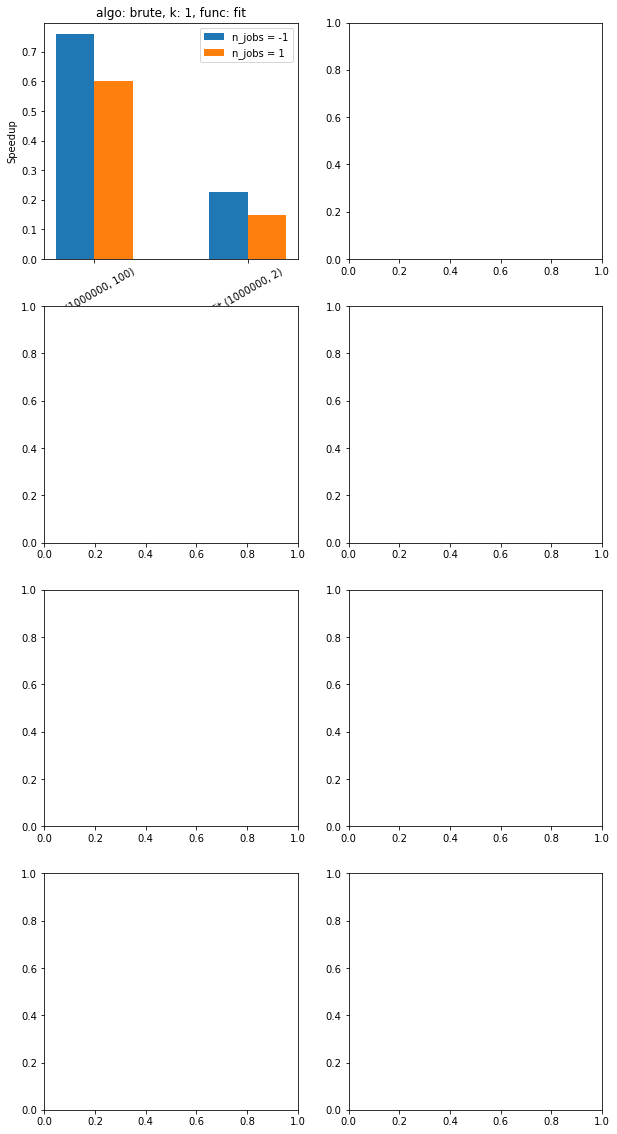

In [11]:
BAR_WIDTH = .25
merged_df_knn_grouped = merged_df_knn.groupby(['algorithm', 'n_neighbors', 'function'])
fig, axes = plt.subplots(4, 2, figsize=(10, 20))
axes = axes.flatten()
for (params, df), ax in zip(merged_df_knn_grouped, axes):
    df = df.loc[(df.n_samples + df.n_features).sort_values().index]
    n_jobs_vals = df['n_jobs'].unique()
    n_bars = len(n_jobs_vals)
    for i, val in enumerate(n_jobs_vals):
        x = np.arange(n_bars)
        n_bars = len(n_jobs_vals)
        if i % 2 == 0:
            x = x - BAR_WIDTH / n_bars
        else:
            x = x + BAR_WIDTH / n_bars
        height = df['speedup'][df['n_jobs'] == val]
        label="n_jobs = %s" % val
        ax.bar(x, height=height, width=BAR_WIDTH, label=label, align='edge')
    title = "algo: %s, k: %s, func: %s" % params
    ax.set_title(title)
    ax.set_xticks(x)
    labels = ["%s (%s, %s)" % tuple(row) for row in df[['function', 'n_samples', 'n_features']].values]
    labels = np.unique(labels)
    ax.set_xticklabels(labels, rotation=30)
    ax.set_ylabel('Speedup')
    ax.legend()
fig.tight_layout()

<br></br>
## KMeans

In [12]:
d4p_kmeans = pd.read_csv('sklearn_benchmarks/results/daal4py/KMeans.csv')

In [13]:
skl_kmeans = pd.read_csv('sklearn_benchmarks/results/sklearn/KMeans.csv')

In [14]:
merged_df_kmeans = skl_kmeans.merge(d4p_kmeans, on=['estimator', 'function', 'n_samples', 'n_features', 'init', 'max_iter', 'n_clusters', 'n_init', 'tol'], suffixes=['_skl', '_d4p'])

In [15]:
merged_df_kmeans['speedup'] = merged_df_kmeans['mean_time_elapsed_skl'] / merged_df_kmeans['mean_time_elapsed_d4p']

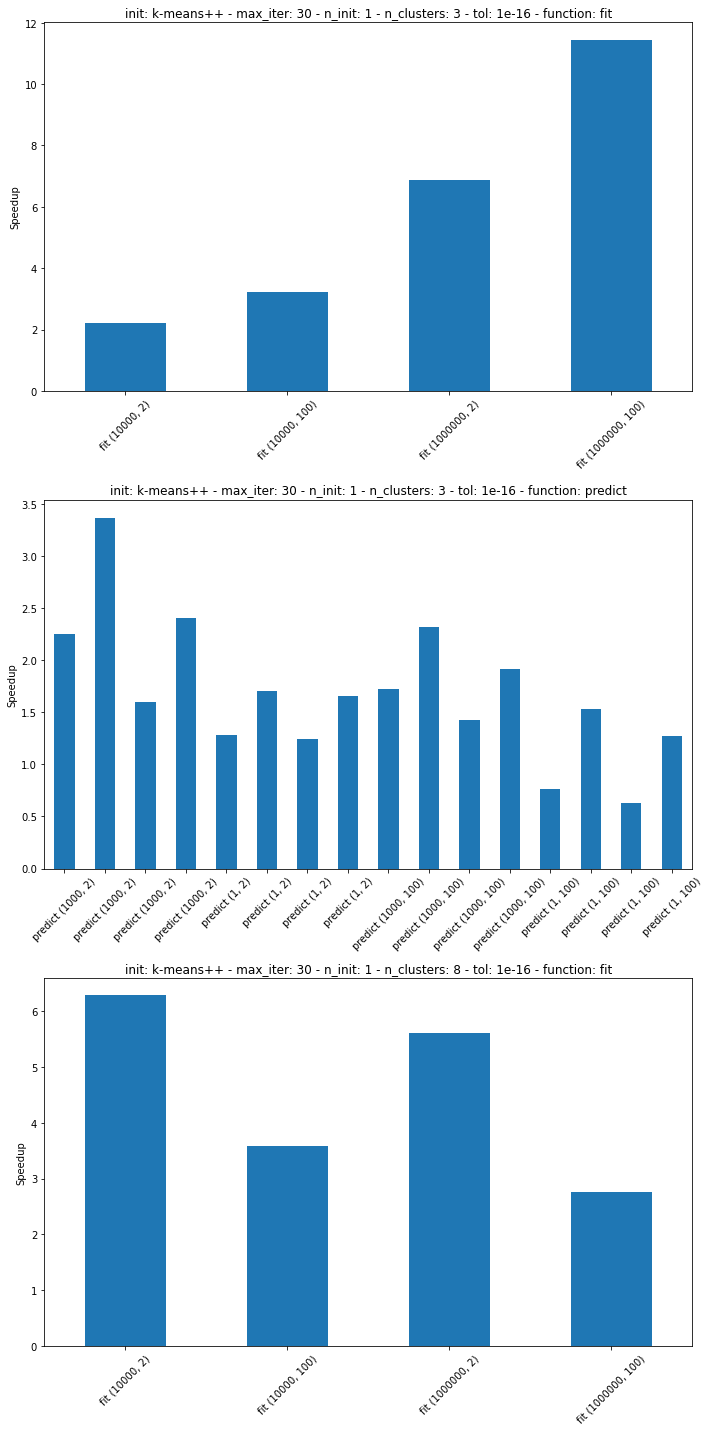

In [16]:
merged_df_kmeans_grouped = merged_df_kmeans.groupby(['init', 'max_iter', 'n_init', 'n_clusters', 'tol', 'function'])
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 20))
axes = axes.flatten()
for (params, df), ax in zip(merged_df_kmeans_grouped, axes):
    df['speedup'].plot.bar(ax=ax)
    title = "init: %s - max_iter: %s - n_init: %s - n_clusters: %s - tol: %s - function: %s" % params
    ax.set_title(title)
    ax.set_ylabel('Speedup')
    labels = [f"{func} ({ns}, {nf})" for func, ns, nf in df[['function', 'n_samples', 'n_features']].to_numpy()]
    ax.set_xticklabels(labels=labels)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
plt.tight_layout();